# k-Nearest Neighbors (kNN)

The k-Nearest Neighbors classifier is a **supervised** machine learning model.

Author: Athan Zhang

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

$$
D(p,q) = \sqrt{\sum_{i=1}^{n} \left(q_{i} - p_{i}\right)^{2}}
$$

## kNN Class

In [2]:
class kNN():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        """
        Stores the initial training data and labels.
        """
        self.data = X
        self.labels = y
        
    def distance(self, X):  
        """
        Calculates the Euclidean distance between the
        stored training data and input data.
        """
        n_samples, n_attributes = X.shape
        dists = [np.sqrt(np.sum(((self.data - X[i])**2).astype(float), axis=1)) for i in range(n_samples)]
        
        return np.array(dists)
    
    def predict(self, X, k=5):
        """
        Predicts the classification labels for input data.
        """
        dists = self.distance(X)
        
        neighbors = np.argsort(dists)[:, :k]
        neighbor_labels = self.labels[neighbors]
        preds = np.max(neighbor_labels, axis=1)

        return preds

## Initializing and Training the Model

In [3]:
# Load and split data
data = pd.read_csv("iris.csv").to_numpy()
X = data[:,:-1]
Y = data[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1000)

# Instantiate Classifier
clf = kNN()
clf.fit(X_train,Y_train)

## Testing the Model

In [4]:
preds = clf.predict(X_test)

# Calculate Accuracy
acc = np.sum(preds==Y_test) / len(Y_test)
print(f"Testing Accuracy: {acc}")

Testing Accuracy: 0.9333333333333333


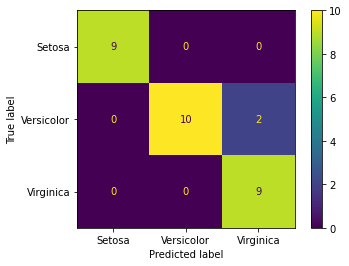

In [5]:
# Show Confusion Matrix
cm = confusion_matrix(Y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y))
disp.plot()

## Finding Ideal k

Text(0, 0.5, 'Accuracy')

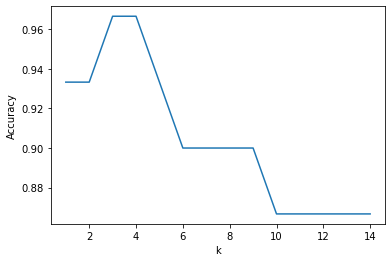

In [6]:
# Plot how accuracy changes with k
ks = [*range(1,15)]
accs = []
for k in ks:
    preds = clf.predict(X_test, k=k)
    acc = np.sum(preds==Y_test) / len(Y_test)
    accs.append(acc)

plt.plot(ks, accs) 
plt.xlabel('k')
plt.ylabel('Accuracy')
    
